In [254]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/employee-attrition-prediction-dataset/employee_attrition_dataset_10000.csv
/kaggle/input/employee-attrition-prediction-dataset/employee_attrition_dataset.csv


# Employee Attrition Prediction Dataset

## Start

### Import the required libraries 

In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
import warnings

init_notebook_mode(connected=True)
warnings.filterwarnings('ignore')

In [256]:
plt.style.use('seaborn-v0_8-pastel')
sns.set_theme(style='whitegrid')

In [257]:
df = pd.read_csv('/kaggle/input/employee-attrition-prediction-dataset/employee_attrition_dataset_10000.csv')

print(df.shape)
df.head()

(10000, 26)


,Employee_ID,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,...,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
0,1,58,Male,Single,Finance,Manager,5,7332,81,24,...,No,9,48,16,4,1,1,49,3,No
1,2,48,Female,Divorced,HR,Assistant,4,6069,55,18,...,Yes,9,57,10,4,1,1,25,1,No
2,3,34,Female,Married,Marketing,Manager,4,11485,65,6,...,Yes,3,55,1,1,4,3,21,1,Yes
3,4,27,Female,Divorced,HR,Manager,4,18707,28,12,...,No,9,53,2,3,4,1,46,2,No
4,5,40,Male,Married,HR,Analyst,1,16398,92,3,...,No,1,54,11,1,1,1,43,4,No


## Key Features:

* Employee_ID: Unique identifier for each employee.

* Age: Age of the employee.

* Gender: Gender of the employee.

* Marital_Status: Marital status of the employee (Single, Married, Divorced).

* Department: Department the employee works in (e.g., HR, IT, Sales, Marketing).

* Job_Role: Specific role within the department (e.g., Manager, Analyst).

* Job_Level: Level in the organizational hierarchy.

* Monthly_Income: Monthly salary of the employee.

* Hourly_Rate: Rate per hour for hourly employees.

* Years_at_Company: Number of years the employee has been with the company.

* Years_in_Current_Role: Number of years the employee has been in their current role.

* Years_Since_Last_Promotion: Time since the employee’s last promotion.

* Work_Life_Balance: Rating of work-life balance.

* Job_Satisfaction: Rating of job satisfaction (1-5 scale).

* Performance_Rating: Performance rating (1-5 scale).

* Training_Hours_Last_Year: Number of training hours completed in the past year.

* Overtime: Whether the employee works overtime (Yes/No).

* Project_Count: Number of projects managed by the employee.

* Average_Hours_Worked_Per_Week: Average working hours per week.

* Absenteeism: Number of days the employee was absent in the past year.

* Work_Environment_Satisfaction: Rating of work environment satisfaction.

* Relationship_with_Manager: Rating of the relationship with the manager.

* Job_Involvement: Rating of job involvement.

* Distance_From_Home: Distance from home to the workplace (in kilometers).

* Number_of_Companies_Worked: Total number of companies the employee has worked for.

* Attrition: The target column (Yes/No) indicating whether the employee left the company.

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Employee_ID                    10000 non-null  int64 
 1   Age                            10000 non-null  int64 
 2   Gender                         10000 non-null  object
 3   Marital_Status                 10000 non-null  object
 4   Department                     10000 non-null  object
 5   Job_Role                       10000 non-null  object
 6   Job_Level                      10000 non-null  int64 
 7   Monthly_Income                 10000 non-null  int64 
 8   Hourly_Rate                    10000 non-null  int64 
 9   Years_at_Company               10000 non-null  int64 
 10  Years_in_Current_Role          10000 non-null  int64 
 11  Years_Since_Last_Promotion     10000 non-null  int64 
 12  Work_Life_Balance              10000 non-null  int64 
 13  Jo

In [259]:
df.describe()

,Employee_ID,Age,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,39.561800,2.990800,11436.716700,57.032300,14.936200,7.451300,4.471900,2.502400,3.038000,2.507700,49.588900,4.984400,44.473500,9.410200,2.493100,2.491400,2.505400,25.272000,2.516600
std,2886.89568,11.454986,1.410643,4926.528302,24.703261,8.431657,4.042903,2.891617,1.112348,1.414764,1.120833,28.801393,2.580043,8.611662,5.760335,1.120927,1.115101,1.116018,14.219474,1.113934
min,1.00000,20.000000,1.000000,3000.000000,15.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,30.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,30.000000,2.000000,7182.500000,36.000000,8.000000,4.000000,2.000000,2.000000,2.000000,2.000000,25.000000,3.000000,37.000000,4.000000,1.000000,1.000000,2.000000,13.000000,2.000000
50%,5000.50000,40.000000,3.000000,11401.500000,57.000000,15.000000,7.000000,4.000000,2.000000,3.000000,3.000000,49.000000,5.000000,45.000000,9.000000,2.000000,2.000000,3.000000,25.000000,2.000000
75%,7500.25000,49.000000,4.000000,15679.500000,78.000000,22.000000,11.000000,7.000000,3.000000,4.000000,4.000000,75.000000,7.000000,52.000000,14.000000,4.000000,3.000000,3.000000,37.000000,4.000000
max,10000.00000,59.000000,5.000000,19999.000000,99.000000,29.000000,14.000000,9.000000,4.000000,5.000000,4.000000,99.000000,9.000000,59.000000,19.000000,4.000000,4.000000,4.000000,49.000000,4.000000


In [260]:
df.isnull().sum()

Employee_ID                      0
Age                              0
Gender                           0
Marital_Status                   0
Department                       0
Job_Role                         0
Job_Level                        0
Monthly_Income                   0
Hourly_Rate                      0
Years_at_Company                 0
Years_in_Current_Role            0
Years_Since_Last_Promotion       0
Work_Life_Balance                0
Job_Satisfaction                 0
Performance_Rating               0
Training_Hours_Last_Year         0
Overtime                         0
Project_Count                    0
Average_Hours_Worked_Per_Week    0
Absenteeism                      0
Work_Environment_Satisfaction    0
Relationship_with_Manager        0
Job_Involvement                  0
Distance_From_Home               0
Number_of_Companies_Worked       0
Attrition                        0
dtype: int64

In [261]:
df.describe(include='object')

,Gender,Marital_Status,Department,Job_Role,Overtime,Attrition
count,10000,10000,10000,10000,10000,10000
unique,2,3,5,4,2,2
top,Female,Married,Marketing,Analyst,No,No
freq,5042,3375,2133,2572,5103,8003


In [262]:
df['Gender'].value_counts()

Gender
Female    5042
Male      4958
Name: count, dtype: int64

In [263]:
df = df.rename(columns={'Gender': 'Female'})
df['Female'] = df['Female'].map({'Female': 1, 'Male': 0})

In [264]:
df.select_dtypes(include=['object', 'category']).columns

for column in list(df.select_dtypes(include=['object', 'category']).columns):
    print('-'*35)
    print(df[f'{column}'].value_counts())
    print('-'*35)

-----------------------------------
Marital_Status
Married     3375
Divorced    3330
Single      3295
Name: count, dtype: int64
-----------------------------------
-----------------------------------
Department
Marketing    2133
Sales        2008
Finance      1990
HR           1953
IT           1916
Name: count, dtype: int64
-----------------------------------
-----------------------------------
Job_Role
Analyst      2572
Assistant    2538
Executive    2476
Manager      2414
Name: count, dtype: int64
-----------------------------------
-----------------------------------
Overtime
No     5103
Yes    4897
Name: count, dtype: int64
-----------------------------------
-----------------------------------
Attrition
No     8003
Yes    1997
Name: count, dtype: int64
-----------------------------------


In [265]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['Overtime'] = df['Overtime'].map({'Yes': 1, 'No': 0})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Employee_ID                    10000 non-null  int64 
 1   Age                            10000 non-null  int64 
 2   Female                         10000 non-null  int64 
 3   Marital_Status                 10000 non-null  object
 4   Department                     10000 non-null  object
 5   Job_Role                       10000 non-null  object
 6   Job_Level                      10000 non-null  int64 
 7   Monthly_Income                 10000 non-null  int64 
 8   Hourly_Rate                    10000 non-null  int64 
 9   Years_at_Company               10000 non-null  int64 
 10  Years_in_Current_Role          10000 non-null  int64 
 11  Years_Since_Last_Promotion     10000 non-null  int64 
 12  Work_Life_Balance              10000 non-null  int64 
 13  Jo

### *Ok, we have preprocessed the data, made it a little more convenient*

### *Let's start visualizing*

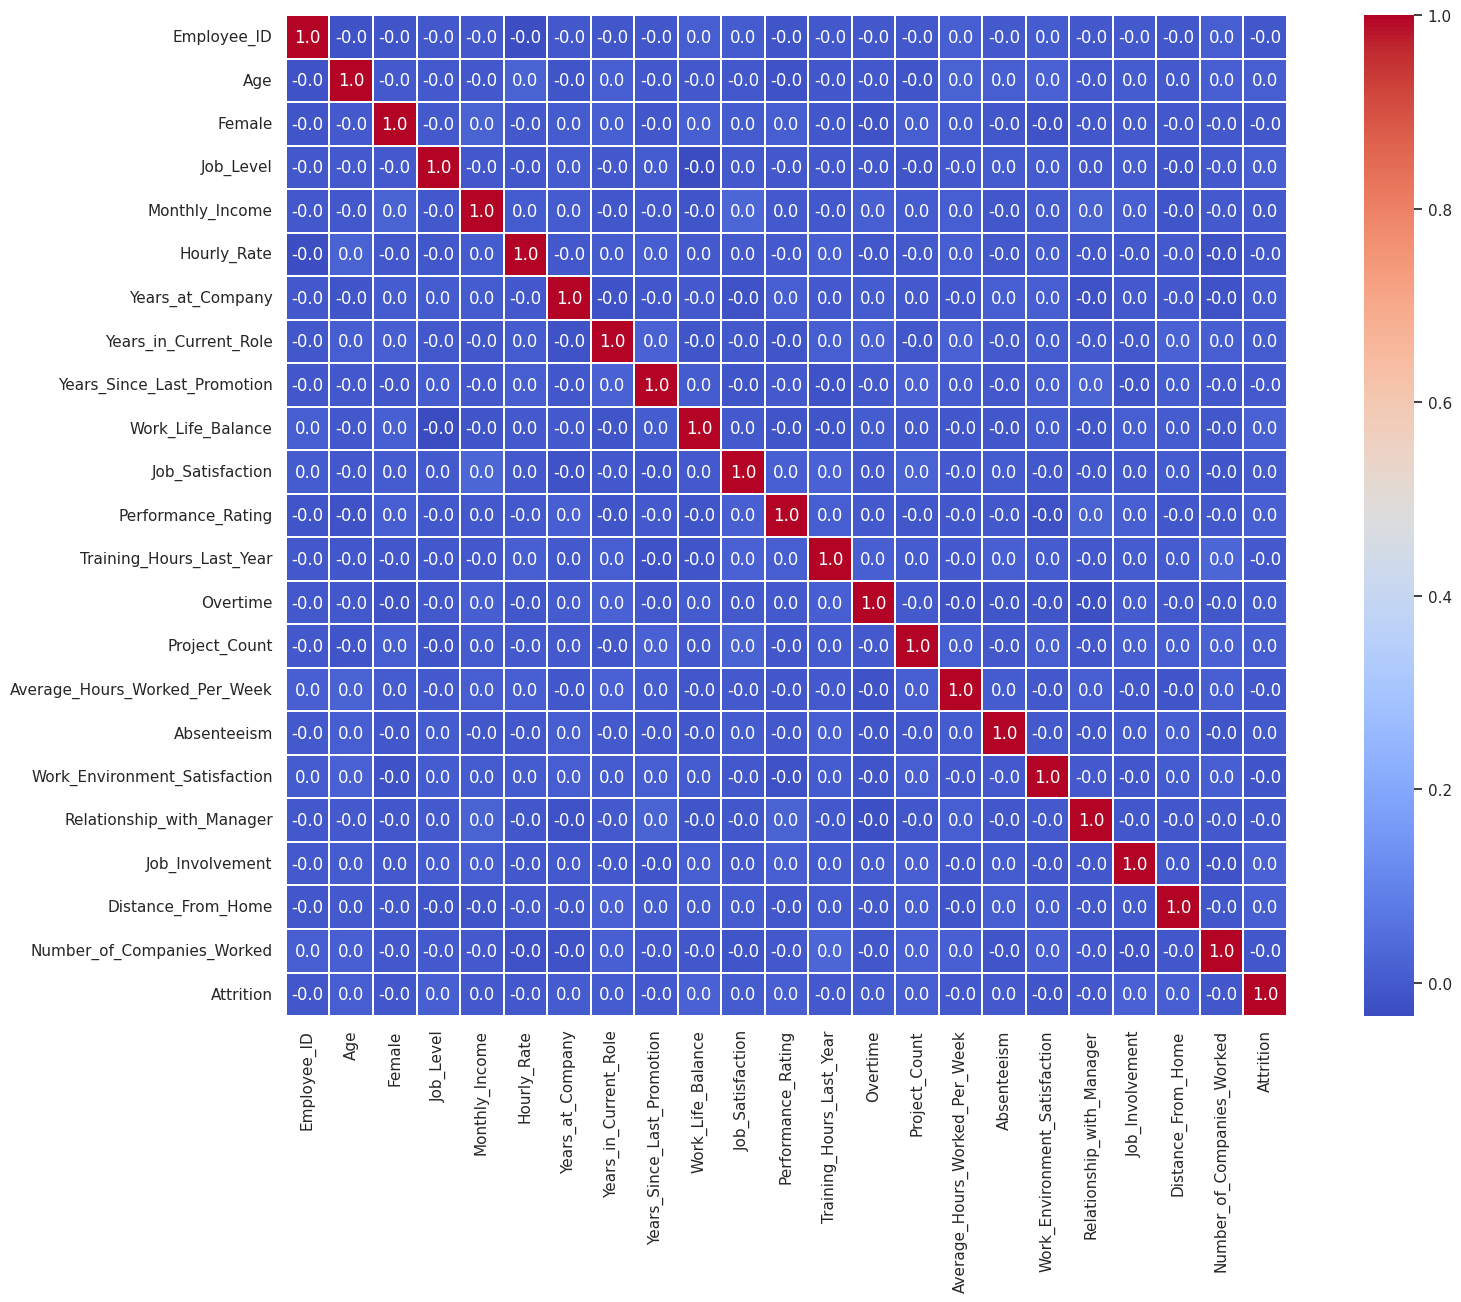

In [266]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(20, 13))
sns.heatmap(correlation_matrix, square=True,
            annot=True, fmt='.1f', linewidths=0.1, cmap='coolwarm');

### *No correlations found, great*

In [267]:
df.columns

Index(['Employee_ID', 'Age', 'Female', 'Marital_Status', 'Department',
       'Job_Role', 'Job_Level', 'Monthly_Income', 'Hourly_Rate',
       'Years_at_Company', 'Years_in_Current_Role',
       'Years_Since_Last_Promotion', 'Work_Life_Balance', 'Job_Satisfaction',
       'Performance_Rating', 'Training_Hours_Last_Year', 'Overtime',
       'Project_Count', 'Average_Hours_Worked_Per_Week', 'Absenteeism',
       'Work_Environment_Satisfaction', 'Relationship_with_Manager',
       'Job_Involvement', 'Distance_From_Home', 'Number_of_Companies_Worked',
       'Attrition'],
      dtype='object')

In [268]:
fig = px.scatter_3d(df, x='Age', y='Department', z='Years_at_Company', 
                    color='Attrition', animation_frame='Female', template='ggplot2')
fig.show(renderer='iframe_connected')

In [269]:
fig = px.histogram(df, x='Department', color='Attrition', animation_frame='Female')
fig.show(renderer='iframe_connected')

In [270]:
fig = px.histogram(df, x='Age', color='Attrition', animation_frame='Female')
fig.show(renderer='iframe_connected')

In [271]:
fig = px.box(df, x='Job_Level', y='Years_at_Company', color='Attrition', animation_frame='Age', points="all")
fig.show(renderer='iframe_connected')

In [272]:
fig = px.density_heatmap(
    df,
    x='Work_Environment_Satisfaction',
    y='Average_Hours_Worked_Per_Week',
    facet_row='Overtime',
    facet_col='Attrition',
    
    width=1200,  
    height=800, 
    
    facet_row_spacing=0.1, 
    facet_col_spacing=0.1, 
    
    text_auto=True,    
)

fig.update_layout(
    margin=dict(l=50, r=50, t=50, b=50),  
    autosize=False, 
    font_size=12 
)

fig.show(renderer='iframe_connected')

In [273]:
df['Years_Since_Last_Promotion'].value_counts()

Years_Since_Last_Promotion
0    1058
8    1027
1    1023
6    1017
7    1009
2     991
4     978
3     970
9     969
5     958
Name: count, dtype: int64

In [274]:
gr = df.groupby(['Years_Since_Last_Promotion', 'Attrition', 'Job_Satisfaction'])['Employee_ID'].size().reset_index(name='cnt')
gr

,Years_Since_Last_Promotion,Attrition,Job_Satisfaction,cnt
0,0,0,1,164
1,0,0,2,172
2,0,0,3,168
3,0,0,4,179
4,0,0,5,170
...,...,...,...,...
95,9,1,1,39
96,9,1,2,40
97,9,1,3,40
98,9,1,4,46


In [275]:
fig = px.bar(gr, x='Years_Since_Last_Promotion', y='cnt',
             color='Attrition', animation_frame='Job_Satisfaction', template='ggplot2')
fig.show(renderer='iframe_connected')

In [276]:
gr = df.groupby(['Work_Environment_Satisfaction', 'Attrition', 
                 'Relationship_with_Manager', 'Job_Involvement', 
                 'Number_of_Companies_Worked'])['Employee_ID'].size().reset_index(name='cnt')
gr

,Work_Environment_Satisfaction,Attrition,Relationship_with_Manager,Job_Involvement,Number_of_Companies_Worked,cnt
0,1,0,1,1,1,28
1,1,0,1,1,2,26
2,1,0,1,1,3,39
3,1,0,1,1,4,40
4,1,0,1,2,1,24
...,...,...,...,...,...,...
507,4,1,4,3,4,8
508,4,1,4,4,1,8
509,4,1,4,4,2,8
510,4,1,4,4,3,11


In [277]:
fig = px.scatter_3d(gr, x='cnt', y='Relationship_with_Manager', 
              z='Job_Involvement', color='Attrition', 
              animation_frame='Number_of_Companies_Worked',
              template='ggplot2'
             )
fig.show(renderer='iframe_connected')

In [278]:
Q1 = df['Average_Hours_Worked_Per_Week'].quantile(0.25)
Q3 = df['Average_Hours_Worked_Per_Week'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Average_Hours_Worked_Per_Week'] >= Q1 - 1.5*IQR) & (df['Average_Hours_Worked_Per_Week'] <= Q3 + 1.5*IQR)]

In [279]:
import shap
from sklearn.model_selection import GridSearchCV

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import (accuracy_score, recall_score, precision_score, 
                             f1_score, roc_auc_score, confusion_matrix, 
                             classification_report)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

In [280]:
df = df.drop(columns=['Employee_ID'])
df.columns

Index(['Age', 'Female', 'Marital_Status', 'Department', 'Job_Role',
       'Job_Level', 'Monthly_Income', 'Hourly_Rate', 'Years_at_Company',
       'Years_in_Current_Role', 'Years_Since_Last_Promotion',
       'Work_Life_Balance', 'Job_Satisfaction', 'Performance_Rating',
       'Training_Hours_Last_Year', 'Overtime', 'Project_Count',
       'Average_Hours_Worked_Per_Week', 'Absenteeism',
       'Work_Environment_Satisfaction', 'Relationship_with_Manager',
       'Job_Involvement', 'Distance_From_Home', 'Number_of_Companies_Worked',
       'Attrition'],
      dtype='object')

In [281]:
numeric_features = ['Age', 'Female', 'Monthly_Income', 'Hourly_Rate', 'Years_at_Company',
       'Years_in_Current_Role', 'Years_Since_Last_Promotion',
       'Work_Life_Balance', 'Job_Satisfaction', 'Performance_Rating',
       'Training_Hours_Last_Year', 'Overtime', 'Project_Count',
       'Average_Hours_Worked_Per_Week', 'Absenteeism',
       'Work_Environment_Satisfaction', 'Relationship_with_Manager',
       'Job_Involvement', 'Distance_From_Home', 'Number_of_Companies_Worked']

categorical_features = ['Marital_Status', 'Department', 'Job_Role', 'Job_Level']

Fitting 3 folds for each of 40 candidates, totalling 120 fits

 Best params:
{'classifier': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...), 'classifier__learning_rate': 0.01, 'classifier__max_depth': 5, 'classifier__n_estimators': 200, 'smote__sampling_strategy': 0.8}

Best Model Classification

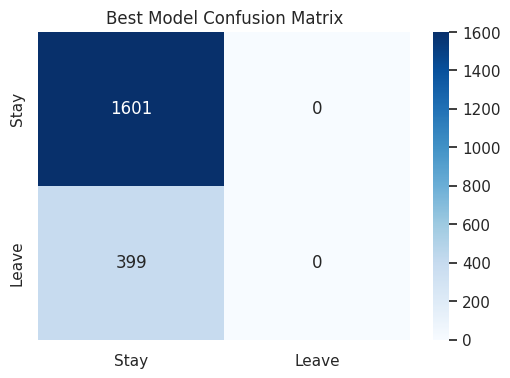

,Accuracy,Recall,Precision,F1,AUC-ROC
Best Model,0.8005,0.0000,0.0000,0.0000,0.5101



 Top-5 models cross-validation:


,params,mean_test_score,std_test_score
15,"{'classifier': XGBClassifier(base_score=None, ...",0.516927,0.007959
14,"{'classifier': XGBClassifier(base_score=None, ...",0.514779,0.012559
39,{'classifier': RandomForestClassifier(random_s...,0.514244,0.017707
12,"{'classifier': XGBClassifier(base_score=None, ...",0.514106,0.008744
37,{'classifier': RandomForestClassifier(random_s...,0.513348,0.019754


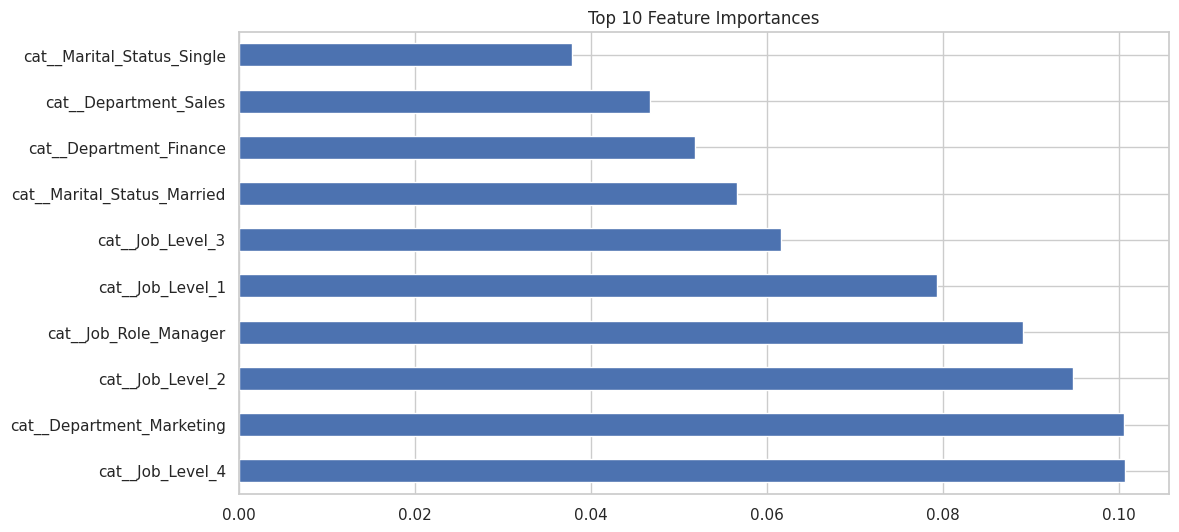

In [282]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

X = df.drop(columns=['Attrition'])
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(random_state=42))
])

param_grid = [
    {
        'classifier': [XGBClassifier(random_state=42)],
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [3, 5],
        'classifier__learning_rate': [0.1, 0.01],
        'smote__sampling_strategy': [0.5, 0.8]
    },
    {
        'classifier': [RandomForestClassifier(random_state=42)],
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [3, 5, None],
        'classifier__max_features': ['sqrt', 0.5],
        'smote__sampling_strategy': [0.5, 0.8]
    }
]

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=StratifiedKFold(3),
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("\n Best params:")
print(grid_search.best_params_)

def evaluate_model(model, X_test, y_test, model_name):
    """Расширенная оценка модели с визуализацией"""
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    
    print(f"\n\033[1m{model_name} Classification Report:\033[0m")
    print(classification_report(y_test, y_pred, target_names=['Stay', 'Leave']))
    
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), 
                annot=True, fmt='d', cmap='Blues',
                xticklabels=['Stay', 'Leave'],
                yticklabels=['Stay', 'Leave'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()
    
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
        'AUC-ROC': roc_auc_score(y_test, y_proba)
    }
    
    metrics_df = pd.DataFrame([metrics], index=[model_name])
    styled_metrics = metrics_df.style \
        .format('{:.4f}') \
        .background_gradient(cmap='YlGnBu') \
        .set_caption(f'{model_name} Performance Metrics')
    
    display(styled_metrics)
    return metrics

best_model = grid_search.best_estimator_
best_metrics = evaluate_model(best_model, X_test, y_test, 'Best Model')

results = pd.DataFrame(grid_search.cv_results_)
top_models = results.sort_values('rank_test_score').head(5)

print("\n Top-5 models cross-validation:")
display(top_models[['params', 'mean_test_score', 'std_test_score']])

fitted_preprocessor = best_model.named_steps['preprocessor']

if isinstance(best_model.named_steps['classifier'], XGBClassifier):
    feature_importances = pd.Series(
        best_model.named_steps['classifier'].feature_importances_,
        index=fitted_preprocessor.get_feature_names_out()
    )
elif isinstance(best_model.named_steps['classifier'], RandomForestClassifier):
    feature_importances = pd.Series(
        best_model.named_steps['classifier'].feature_importances_,
        index=fitted_preprocessor.get_feature_names_out()
    )

plt.figure(figsize=(12, 6))
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()